In [1]:
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

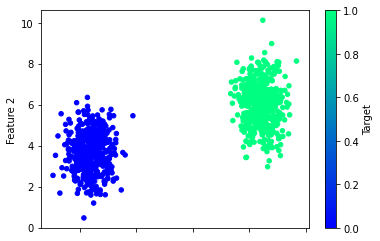

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

We can add layers to our Sequential model using Keras' `Dense` class. For our first layer, we need to define a few parameters:

- The `input_dimparameter` indicates how many inputs will be in the model (in this case two).
- The `units` parameter indicates how many neurons we want in the hidden layer (in this case one).
- The `activation` parameter indicates which activation function to use. We'll use the ReLU activation function to allow our hidden layer to identify and train on nonlinear relationships in the dataset.

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

Now that we have our input and hidden layers built, we need to add an output layer. we'll use the `Dense` class to tell our `Sequential` model what to do with the data. This time, we only need to supply the number of output neurons. For a classification model, we only want a yes or no binary decision; therefore, we only need one output neuron. In our previous layer, we used a ReLU activation function to enable nonlinear relationships; however, for our classification output, we want to use a sigmoid activation function to produce a probability output. 

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


Now that we have our layers defined, we have to inform the model how it should train using the input data. The process of informing the model how it should learn and train is called <b>compiling</b> the model.

Depending on the function of the neural network, we'll have to compile the neural network using a specific optimization function and loss metric. The **optimization function** shapes and molds a neural network model while it is being trained to ensure that it performs to the best of its ability. The **loss metric** is used by machine learning algorithms to score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input. To enhance the performance of our classification neural network, we'll use the `adam` optimizer, which uses a gradient descent approach to ensure that the algorithm will not get stuck on weaker classifying variables and features. As for the loss function, we'll use `binary_crossentropy`, which is specifically designed to evaluate a binary classification model.

In addition to the optimization function and loss metric, we'll also add a more reader-friendly **evaluation metric**, which measures the quality of the machine learning model. There are two main types of evaluation metrics—the model predictive accuracy and model mean squared error (MSE). We use `accuracy` for classification models and `mse` for regression models. For model predictive accuracy, the higher the number the better, whereas for regression models, MSE should reduce to zero.

links:
1) [optimization functions](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

2)[loss metrics](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

In [10]:
#fit model to data
fitModel = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6469 - accuracy: 0.7400
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6310 - accuracy: 0.7960
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6129 - accuracy: 0.8413
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.8893
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.9280
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.9600
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.9747
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.9827
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.9920
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.9960
Epoch 11/

Looking at the model training output, the loss metric was 0.074 and the predictive accuracy is 1.0. This means that although our model performance had more loss than the simulation data, the model correctly classifies all of our training data, which is sufficient. 

Under the hood, the neural network will select random weights to start training the model, so that each and every time we create a neural network, the model will be different. However, due to the `adam ` optimizer, our model's end performance should be very similar, regardless of the loss function.

When training completes, the model object stores the loss and accuracy metrics across all epochs, which we can use to visualize the training progress.

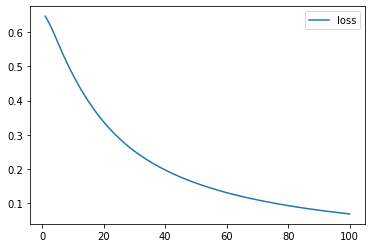

In [11]:
#get model epoch history into a dataframe
historyDF = pd.DataFrame(fitModel.history, index=range(1,len(fitModel.history["loss"])+1))

#plot history data
historyDF.plot(y="loss")

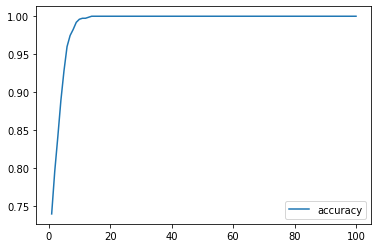

In [12]:
#plot accuracy data
historyDF.plot(y="accuracy")

Now we have to test our model against the test data


In [13]:
modelLoss, modelAccuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {modelLoss}, Accuracy: {modelAccuracy}")

8/8 - 0s - loss: 0.0699 - accuracy: 1.0000 - 102ms/epoch - 13ms/step
Loss: 0.06988773494958878, Accuracy: 1.0


Looking at the performance metrics from the model, the neural network was able to correctly classify each of the points in the test data. In other words, the model was able to correctly classify data it was not trained on 100% of the time. Now that we have a trained neural network model and we have verified its performance using a test dataset, we can apply this model to novel datasets and predict the classification of a data point. In our Sequential model, we can use the `predict` method to generate predictions on new data. For example, we'll predict the class of a new blob dataset.

In [14]:
#classification prediction of a new blob
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X)>0.5).astype("int64")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

To analyze non-linear data, we can use a `make_moons' as a way to make classes

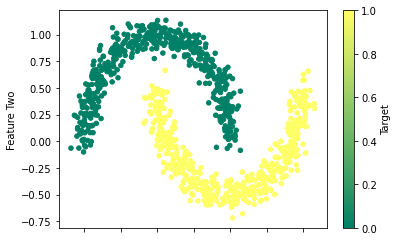

In [15]:
from sklearn.datasets import make_moons

#create dumdata
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

#xforming y_moons into a vertical vector
y_moons = y_moons.reshape(-1,1)

#set up dataframe for plottin
moonsDF = pd.DataFrame(X_moons, columns=["Feature One", "Feature Two"])
moonsDF["Target"]=y_moons

#plot
moonsDF.plot.scatter(x="Feature One", y="Feature Two", c="Target", colormap="summer")

In [16]:
#split moons into train/test data

X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)

#create scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

#fit scalre
X_moon_scaler.fit(X_moon_train)

#scale data
X_train_scaled = X_moon_scaler.transform(X_moon_train)
X_test_scaled = X_moon_scaler.transform(X_moon_test)


In [17]:
#train model with nonlinear data
moonModel = nn_model.fit(X_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7833 - accuracy: 0.6107
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.6373
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6154 - accuracy: 0.6680
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5670 - accuracy: 0.6853
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5298 - accuracy: 0.7053
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5007 - accuracy: 0.7120
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4760 - accuracy: 0.7293
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.7387
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.7507
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.7653
Epoch 11/

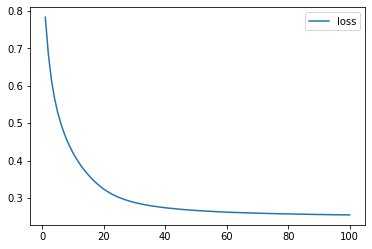

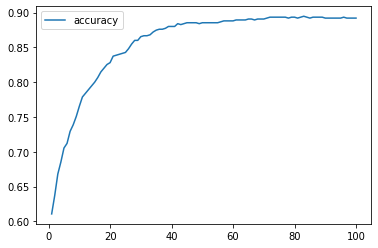

In [18]:
  #analyzing nn
historyDF = pd.DataFrame(moonModel.history, index=range(1,len(moonModel.history["loss"])+1))

#plot df
historyDF.plot(y="loss")
historyDF.plot(y="accuracy")


Since our blob and moon-shaped dummy datasets are created using two variables, our neural network model uses two input values. Applying the neuron rule of thumb (neurons should be 2-3 times as much as inputs), we should use a neural network model with six neurons in the hidden layer to properly model our linear and nonlinear datasets. Thankfully, designing a neural network with more layers is the exact same workflow as before, except we tweak a few parameters.

Using our new `Sequential` model, we'll add our input, hidden, and output layers using the `Dense` class. However, this time we'll create a hidden layer with six neurons instead of one by changing the units parameter while keeping all other parameters the same. To our notebooks, we'll add and run the following code:

In [19]:
# Generate our new Sequential model

new_model = tf.keras.models.Sequential()

# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

Now that our new Sequential model is defined, we need to compile and train the model using our nonlinear moon-shaped dummy data. For us to make direct comparisons with our single-neuron model, we'll use the same training parameters, including loss metric, optimizer function, and number of epochs.

In [20]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit model to training data
new_fit_model = new_model.fit(X_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8029 - accuracy: 0.4693
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7659 - accuracy: 0.4693
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7304 - accuracy: 0.4667
Epoch 4/100
24/24 [==============================] - 0s 968us/step - loss: 0.6963 - accuracy: 0.4293
Epoch 5/100
24/24 [==============================] - 0s 975us/step - loss: 0.6624 - accuracy: 0.4053
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6288 - accuracy: 0.4987
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5965 - accuracy: 0.7720
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5643 - accuracy: 0.8373
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5346 - accuracy: 0.8387
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.8413
Epoch

Looking at the training metrics of our new model, as we increase the number of neurons within the hidden layer, the classification accuracy improves. Adding multiple neurons to our neural network did not yield a perfect classification model. As input data becomes more complex, neural networks will require more and more optimization tweaks to achieve their desired accuracy.

## Check Out Your Input Dataset
It is always a good idea to check the input data and ensure that there are no variables or set of outliers that are causing the model to be confused. Although neural networks are tolerant of noisy characteristics in a dataset, neural networks can learn bad habits (like the brain does). Even if we standardize and scale our numerical variables, too many outliers in a single variable can lead to performance issues.

## Add More Neurons and Hidden Layers
Adding neurons to a hidden layer has diminishing returns; more neurons means more data as well as a risk to overfitting the model. Instead of adding more neurons, we could change the structure of the model by adding additional hidden layers, which allows neurons to train on activated input values, instead of looking at new training data. Therefore, a neural network with multiple layers can identify nonlinear characteristics of the input data without requiring more input data. This concept of a multiple-layered neural network is known as a **deep learning** neural network. We'll be exploring deep learning neural networks in greater detail later in the module.

## Use a Different Activation Function
Another strategy to increase performance of a neural network is to change the activation function used across hidden layers. Depending on the shape and dimensionality of the input data, one activation function may focus on specific characteristics of the input values, while another activation function may focus on others.


It is important to use an activation function that matches the complexity of the input data. If we wanted to rank the four most-used activation functions by data complexity and ideal use case, the order would be as follows:

    1) The sigmoid function values are normalized to a probability between 0 and 1, which is ideal for binary classification.
    2) The tanh function can be used for classification or regression, and it expands the range between -1 and 1.
    3) The ReLU function is ideal for looking at positive nonlinear input data for classification or regression.
    4) The Leaky ReLU function is a good alternative for nonlinear input data with many negative inputs.

By default, the Keras Dense layer will implement the linear activation function, which means that the net sum value is not transformed. In other words:

    f(x) = x

The linear activation function limits the neural network model to only perform a linear regression. Therefore, the linear activation function is only appropriate for an output layer.

## Add Additional Epochs to Training Regimen
As the number of epochs increases, so does the amount of information provided to each neuron. By providing each neuron more information from the input data, the neurons are more likely to apply more effective weight coefficients. Adding more epochs to the training parameters is not a perfect solution—if the model produces weight coefficients that are too effective, there is an increased risk of model overfitting. Therefore, models should be tested and evaluated each time the number of epochs are increased to reduce the risk of overfitting.
